### Background

Pernalonga, a leading supermarket chain of over 400 stores in Lunitunia, sells over 10 thousand products in over 400 categories.  Pernalonga regularly partners with suppliers to fund promotions and derives about 30% of its sales on promotions.  While a majority of its promotion activities are in-store promotions, it recently started partnering with select suppliers to experiment on personalized promotions.  In theory, personalized promotions are more efficient as offers are only made to targeted individuals who required an offer to purchase a product.  In contrast, most in-store promotions make temporary price reductions on a product available to all customers whether or not a customer needs the incentive to purchase the product.  The efficiency of personalized promotion comes from an additional analysis required on customer transaction data to determine which customers are most likely to purchase a product to be offered in order to maximize the opportunity for incremental sales and profits.

### Problem

Your analytics consulting firm is being considered by Pernalonga (the client) to develop a marketing campaign to experiment on personalized promotions.  While the details of specific partnerships with suppliers to fund the experimental personalized promotions are still being negotiated, you have started to receive data from the client.  You have two weeks to analyze and understand the data and report back initial insights to the client.  In order to be selected as the sole-developer of the marketing campaign, your team needs to demonstrate that you know the data very well, i.e., you need to show the client that you know the profiles of their stores, products and customers better than they do and are ready to take on the task of developing the marketing campaign. 

From the client’s point of view, they need to be confident that you know the answers to the following key questions:

   * Who are the best customers in terms of revenues, profits, transactions/store visits, number of products, etc.?
   * What are the products and product groups with the best volumes, revenues, profits, transactions, customers, etc.?
   * Which stores rank the highest in volumes, revenues, profits, transactions, customers, etc.?
   * Are there interesting groupings of customers, e.g., most valuable (buy everything at any price) or cherry-pickers (buy mostly on promotions), defined by certain categories (buy baby products or never buy milk), etc.?
   * Other than product categories and sub-categories, are there other product groupings, e.g., Key Value Items (KVI) and Key Value Categories (KVC), traffic drivers, always promoted versus seldom/never promoted, etc.?
   * Are there natural groupings of stores, e.g., stores frequented by cherry-pickers versus stores visited by most loyal customers?


### Available Data

##### transaction_table.csv - contains transaction history in 2016 and 2017 for close to 8,000 customers


   * cust_id – Customer ID
   * tran_id – Transaction ID
   * tran_dt – Transaction Date
   * store_id – Store ID
   * prod_id – Product ID
   * prod_unit – Product unit of measure: CT for count and KG for kilograms
   * prod_unit_price – Unit price of the product
   * tran_prod_sale_qty – Quantity/units of the product in the transaction
   * tran_prod_sale_amt – Sales amount for the product before discounts in the transaction
   * tran_prod_discount_amt – Total amount of discounts applied to the product in the transaction
   * tran_prod_offer_cts – Total number of offers on the product resulting in the total amount of discounts in the transaction
   * tran_prod_paid_amt – Amount paid for the product after discounts are applied in the transaction

##### product_table.csv - contains the product to subcategory and category mapping and descriptions for about 11,000 products 


   * prod_id – Product ID
   * subcategory_id – Subcategory ID
   * category_id – Category ID
   * sub_category_desc – Subcategory name (in Portuguese)
   * category_desc – Category name (in Portuguese)
   * category_desc_eng – Category name (in English)
   * brand_desc – Brand of the product, including NO LABEL and PRIVATE LABEL


# STORES - EXPLORATORY DATA ANALYSIS

In [1]:
# Import libraries

# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import pandas_profiling
import os, sys

import datetime

In [2]:
# set # of columns and rows to display

pd.set_option('max_columns', None)
pd.set_option('max_rows', 50)

In [3]:
# Import transaction table

transactions = pd.read_csv('transaction_table.csv')

transactions.head()

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
0,139662,2.017110e+18,2017-11-03,584,145519008,CT,2.89,4.0,0.00,0,2.89,0.7225
1,799924,2.017111e+18,2017-11-12,349,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225
2,1399898,2.017102e+18,2017-10-21,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225
3,1399898,2.017111e+18,2017-11-11,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225
4,1399898,2.017121e+18,2017-12-05,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225


In [4]:
# Transactions shape

transactions.shape

(29617585, 12)

In [5]:
# Transactions data types

transactions.dtypes

cust_id                     int64
tran_id                   float64
tran_dt                    object
store_id                    int64
prod_id                     int64
prod_unit                  object
tran_prod_sale_amt        float64
tran_prod_sale_qty        float64
tran_prod_discount_amt    float64
tran_prod_offer_cts         int64
tran_prod_paid_amt        float64
prod_unit_price           float64
dtype: object

In [6]:
# Transactions descriptive statistics

transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
cust_id,29617585.0,5.016900e+07,2.904564e+07,2.956800e+04,2.500986e+07,5.025960e+07,7.568990e+07,9.999978e+07
tran_id,29617585.0,2.016584e+18,4.993258e+14,2.016010e+18,2.016072e+18,2.017011e+18,2.017070e+18,2.017123e+18
store_id,29617585.0,4.457788e+02,2.004097e+02,1.020000e+02,2.940000e+02,3.930000e+02,5.880000e+02,9.990000e+02
prod_id,29617585.0,9.797496e+08,1.192139e+08,1.455190e+08,9.992470e+08,9.993624e+08,9.996799e+08,9.999997e+08
tran_prod_sale_amt,29617585.0,2.503286e+00,4.130594e+00,1.000000e-02,9.000000e-01,1.590000e+00,2.790000e+00,3.371250e+03
tran_prod_sale_qty,29617585.0,1.667866e+00,2.279535e+00,1.000000e-03,1.000000e+00,1.000000e+00,2.000000e+00,2.112000e+03
tran_prod_discount_amt,29617585.0,-4.027838e-01,1.558037e+00,-1.400250e+03,-2.400000e-01,0.000000e+00,0.000000e+00,0.000000e+00
tran_prod_offer_cts,29617585.0,3.408940e-01,5.339727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.600000e+01
tran_prod_paid_amt,29617585.0,2.100502e+00,3.162718e+00,-1.410000e+00,8.400000e-01,1.370000e+00,2.320000e+00,1.971000e+03
prod_unit_price,29617585.0,2.093038e+00,2.587080e+00,7.500000e-03,7.400000e-01,1.390000e+00,2.490000e+00,3.990000e+02


In [7]:
# Is there any amount paid for the product (after discounts) less than 0 ?

(transactions['tran_prod_paid_amt'] < 0).any()

True

In [8]:
# Filter out transactions less than 0

transactions.drop(transactions[transactions['tran_prod_paid_amt'] < 0].index, inplace = True)

In [9]:
# Transactions shape

transactions.shape

(29617577, 12)

In [10]:
# Checking potential errors in number of discounts

transactions["tran_prod_offer_cts"].value_counts()

0     20364070
1      8451995
2       766077
3        30327
4         4706
5          189
6          156
8           18
7           14
10           8
9            7
12           2
13           2
14           1
16           1
18           1
20           1
30           1
76           1
Name: tran_prod_offer_cts, dtype: int64

In [11]:
# Converting transaction date from object to date 

transactions['tran_dt'] = pd.to_datetime(transactions['tran_dt'])

In [12]:
# More than 4 offers on the product

(transactions['tran_prod_offer_cts'] > 4).any()

True

In [13]:
# Individually screening whether the high numbers of discounts are error

transactions[transactions['tran_prod_offer_cts'] == 1].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,8.451995e+06,8.451995e+06,8.451995e+06,8.451995e+06,8.451995e+06,8.451995e+06,8.451995e+06,8451995.0,8.451995e+06,8.451995e+06
mean,5.023613e+07,2.016533e+18,4.455133e+02,9.620627e+08,3.279136e+00,1.737134e+00,-1.198136e+00,1.0,2.081000e+00,2.445389e+00
std,2.905973e+07,5.028834e+14,1.994563e+02,1.626511e+08,4.861358e+00,2.271857e+00,2.151179e+00,0.0,3.017969e+00,3.015256e+00
min,2.956800e+04,2.016010e+18,1.370000e+02,1.455190e+08,1.000000e-02,2.000000e-03,-5.850000e+02,1.0,0.000000e+00,4.944444e-02
25%,2.506982e+07,2.016063e+18,3.030000e+02,9.992378e+08,1.290000e+00,1.000000e+00,-1.300000e+00,1.0,8.900000e-01,9.898214e-01
50%,5.038983e+07,2.016121e+18,3.880000e+02,9.993471e+08,2.000000e+00,1.000000e+00,-6.700000e-01,1.0,1.380000e+00,1.690000e+00
75%,7.570960e+07,2.017080e+18,5.880000e+02,9.996497e+08,3.580000e+00,2.000000e+00,-2.900000e-01,1.0,2.240000e+00,2.790000e+00
max,9.999978e+07,2.017123e+18,9.990000e+02,9.999997e+08,1.166100e+03,7.200000e+02,0.000000e+00,1.0,8.640000e+02,3.990000e+02


In [14]:
transactions[transactions['tran_prod_offer_cts'] == 2].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,7.660770e+05,7.660770e+05,766077.000000,7.660770e+05,766077.000000,766077.000000,766077.000000,766077.0,766077.000000,766077.000000
mean,5.008108e+07,2.016622e+18,428.054890,9.530078e+08,4.910995,2.085320,-2.157011,2.0,2.753984,3.189478
std,2.906043e+07,4.977442e+14,182.010254,1.810934e+08,9.139091,4.651372,4.228822,0.0,5.329454,4.602114
min,2.956800e+04,2.016010e+18,137.000000,1.455190e+08,0.020000,0.006000,-559.680000,2.0,0.000000,0.049444
25%,2.452972e+07,2.016100e+18,304.000000,9.992303e+08,1.590000,1.000000,-2.200000,2.0,0.960000,0.990000
50%,5.012994e+07,2.017022e+18,362.000000,9.993094e+08,2.690000,1.000000,-1.100000,2.0,1.560000,1.980000
75%,7.563963e+07,2.017083e+18,575.000000,9.995454e+08,4.990000,2.000000,-0.530000,2.0,2.840000,3.490000
max,9.999978e+07,2.017123e+18,999.000000,9.999992e+08,1314.720000,2112.000000,0.000000,2.0,755.040000,399.000000


In [15]:
transactions[transactions['tran_prod_offer_cts'] == 3].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,3.032700e+04,3.032700e+04,30327.000000,3.032700e+04,30327.000000,30327.000000,30327.000000,30327.0,30327.000000,30327.000000
mean,4.992584e+07,2.016828e+18,415.941933,9.676086e+08,7.889127,2.533450,-3.581054,3.0,4.308073,4.374162
std,2.904563e+07,4.463604e+14,166.616718,1.534534e+08,17.986815,5.685341,7.296938,0.0,11.407751,5.152979
min,2.956800e+04,2.016010e+18,137.000000,1.525760e+08,0.110000,0.060000,-324.800000,3.0,0.000000,0.079000
25%,2.364976e+07,2.016122e+18,310.000000,9.992313e+08,1.990000,1.000000,-3.720000,3.0,1.100000,1.150000
50%,5.003995e+07,2.017082e+18,347.000000,9.993498e+08,3.780000,1.000000,-1.600000,3.0,1.950000,2.190000
75%,7.568495e+07,2.017122e+18,561.000000,9.996265e+08,7.990000,3.000000,-0.740000,3.0,4.090000,5.488982
max,9.999978e+07,2.017123e+18,999.000000,9.999992e+08,674.550000,450.000000,-0.010000,3.0,459.650000,89.900000


In [16]:
transactions[transactions['tran_prod_offer_cts'] == 4].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,4.706000e+03,4.706000e+03,4706.000000,4.706000e+03,4706.000000,4706.000000,4706.000000,4706.0,4706.000000,4706.000000
mean,5.052354e+07,2.016491e+18,425.311305,9.695883e+08,14.002890,4.525606,-6.065852,4.0,7.937038,3.856950
std,2.903737e+07,4.832187e+14,181.413809,1.447050e+08,33.036649,7.659172,13.342729,0.0,20.840821,4.992215
min,3.977400e+04,2.016010e+18,137.000000,1.525760e+08,0.280000,0.166000,-302.940000,4.0,0.000000,0.079000
25%,2.427989e+07,2.016092e+18,303.000000,9.992349e+08,3.160000,2.000000,-5.640000,4.0,1.960000,0.890000
50%,5.076972e+07,2.016113e+18,353.000000,9.993284e+08,5.800000,2.000000,-2.460000,4.0,3.195000,1.990000
75%,7.631957e+07,2.017071e+18,572.000000,9.995469e+08,11.980000,4.000000,-1.020000,4.0,6.780000,3.990404
max,9.995981e+07,2.017123e+18,999.000000,9.999992e+08,484.380000,240.000000,-0.020000,4.0,305.660000,89.900000


In [17]:
transactions[transactions['tran_prod_offer_cts'] == 5].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,1.890000e+02,1.890000e+02,189.000000,1.890000e+02,189.000000,189.000000,189.000000,189.0,189.000000,189.000000
mean,5.064420e+07,2.016588e+18,423.677249,9.738502e+08,38.884656,11.585021,-14.416720,5.0,24.467937,4.007382
std,2.963801e+07,4.932579e+14,158.659969,1.327157e+08,93.161257,44.655027,32.661957,0.0,61.203388,4.468830
min,1.129755e+06,2.016011e+18,150.000000,1.806110e+08,1.160000,0.966000,-175.000000,5.0,0.740000,0.160000
25%,2.741962e+07,2.016093e+18,321.000000,9.992694e+08,3.600000,2.462000,-8.840000,5.0,2.750000,0.600000
50%,5.012994e+07,2.017011e+18,365.000000,9.995324e+08,7.960000,5.000000,-3.670000,5.0,4.270000,1.960000
75%,7.631991e+07,2.017080e+18,557.000000,9.997465e+08,19.670000,7.000000,-0.610000,5.0,11.360000,5.850000
max,9.960000e+07,2.017123e+18,986.000000,9.999869e+08,459.440000,600.000000,-0.250000,5.0,292.220000,19.990000


In [18]:
transactions[transactions['tran_prod_offer_cts'] == 6].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,1.560000e+02,1.560000e+02,156.000000,1.560000e+02,156.000000,156.000000,156.000000,156.0,156.000000,156.000000
mean,4.632069e+07,2.016500e+18,458.493590,9.596576e+08,31.380385,7.491410,-13.626474,6.0,17.753910,5.081309
std,2.756065e+07,4.862197e+14,188.609735,1.721638e+08,68.688221,9.090859,26.264291,0.0,43.715449,5.851404
min,2.997490e+05,2.016010e+18,143.000000,1.527610e+08,0.560000,0.710000,-210.000000,6.0,0.320000,0.160000
25%,2.529998e+07,2.016101e+18,332.750000,9.992287e+08,4.745000,2.027000,-13.200000,6.0,3.300000,0.990000
50%,4.203986e+07,2.016112e+18,475.000000,9.992702e+08,10.765000,4.000000,-5.040000,6.0,5.145000,2.590000
75%,6.440970e+07,2.017071e+18,588.000000,9.996354e+08,30.325000,8.000000,-1.690000,6.0,14.512500,7.065000
max,9.910978e+07,2.017122e+18,996.000000,9.999590e+08,599.400000,60.000000,-0.240000,6.0,389.400000,27.990000


In [19]:
transactions[transactions['tran_prod_offer_cts'] == 7].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,1.400000e+01,1.400000e+01,14.000000,1.400000e+01,14.000000,14.000000,14.00000,14.0,14.000000,14.000000
mean,4.901474e+07,2.016572e+18,425.357143,9.995536e+08,54.418571,11.571429,-19.30500,7.0,35.113571,2.352857
std,3.221396e+07,4.973117e+14,136.200422,2.380817e+05,165.782572,17.028096,55.40039,0.0,110.638242,2.985780
min,1.889991e+06,2.016071e+18,172.000000,9.991630e+08,4.200000,3.000000,-210.00000,7.0,2.170000,0.600000
25%,2.898968e+07,2.016092e+18,339.000000,9.993131e+08,4.867500,4.750000,-6.98000,7.0,3.850000,0.600000
50%,4.584957e+07,2.016567e+18,477.000000,9.997465e+08,5.400000,7.500000,-0.52500,7.0,4.950000,0.600000
75%,7.491737e+07,2.017061e+18,483.000000,9.997465e+08,12.720000,9.750000,-0.41250,7.0,6.327500,2.740000
max,9.099966e+07,2.017072e+18,632.000000,9.997465e+08,629.300000,70.000000,-0.35000,7.0,419.300000,8.990000


In [20]:
transactions[transactions['tran_prod_offer_cts'] == 8].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.0,18.000000,18.000000
mean,4.931308e+07,2.016619e+18,362.222222,9.994552e+08,175.810000,23.684778,-71.935556,8.0,103.874444,7.696692
std,2.651170e+07,5.045657e+14,153.739105,2.233359e+05,215.311102,19.923024,82.892298,0.0,134.312050,7.017227
min,1.989964e+07,2.016012e+18,153.000000,9.991638e+08,4.740000,2.000000,-300.000000,8.0,3.250000,0.600000
25%,2.585724e+07,2.016083e+18,269.000000,9.992392e+08,26.495000,8.500000,-109.917500,8.0,12.125000,1.912498
50%,4.426977e+07,2.017022e+18,330.000000,9.994643e+08,79.420000,22.545500,-45.955000,8.0,35.065000,7.489922
75%,7.145472e+07,2.017063e+18,442.250000,9.996429e+08,280.077500,29.214250,-11.442500,8.0,166.930000,10.990090
max,9.772982e+07,2.017121e+18,679.000000,9.997465e+08,749.250000,75.000000,-0.400000,8.0,449.250000,19.990000


In [21]:
transactions[transactions['tran_prod_offer_cts'] == 9].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,7.000000e+00,7.000000e+00,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.0,7.000000,7.000000
mean,6.586539e+07,2.016641e+18,465.000000,9.997189e+08,160.477143,27.866000,-61.544286,9.0,98.932857,3.994243
std,3.434289e+07,5.368426e+14,155.926265,2.499824e+05,308.100407,28.969882,108.063784,0.0,200.940107,5.219656
min,7.819901e+06,2.016050e+18,261.000000,9.992392e+08,6.000000,10.000000,-297.500000,9.0,5.500000,0.600000
25%,4.584957e+07,2.016077e+18,373.000000,9.996767e+08,7.200000,10.579000,-62.565000,9.0,6.600000,0.600000
50%,7.190964e+07,2.017061e+18,477.000000,9.997465e+08,17.350000,13.000000,-6.480000,9.0,10.870000,1.090921
75%,9.505472e+07,2.017062e+18,551.500000,9.998517e+08,118.220000,32.952000,-0.600000,9.0,55.655000,6.040000
max,9.951960e+07,2.017100e+18,668.000000,9.999898e+08,849.150000,85.000000,-0.500000,9.0,551.650000,12.988777


In [22]:
transactions[transactions['tran_prod_offer_cts'] == 10].describe()

,cust_id,tran_id,store_id,prod_id,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price
count,8.000000e+00,8.000000e+00,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.0,8.000000,8.000000
mean,7.003850e+07,2.016576e+18,462.000000,9.997283e+08,327.101250,40.262375,-135.855000,10.0,191.246250,5.032520
std,2.612811e+07,5.365698e+14,170.241006,1.267567e+05,432.868846,38.201864,171.966635,0.0,264.396881,5.493981
min,1.989964e+07,2.016043e+18,261.000000,9.995521e+08,6.000000,10.000000,-450.000000,10.0,5.500000,0.600000
25%,6.539463e+07,2.016083e+18,267.000000,9.996500e+08,6.900000,11.500000,-242.895000,10.0,6.325000,0.600000
50%,7.285980e+07,2.016582e+18,533.500000,9.997465e+08,104.740000,21.549500,-55.940000,10.0,48.800000,2.245000
75%,8.544231e+07,2.017070e+18,607.250000,9.997465e+08,539.822500,62.750000,-0.575000,10.0,296.927500,9.490000
max,9.841998e+07,2.017093e+18,617.000000,9.999887e+08,1099.000000,100.000000,-0.500000,10.0,649.000000,13.990160


In [23]:
# Number of discounts larger than 6 don't seem to make sense

transactions.drop(transactions[transactions['tran_prod_offer_cts'] > 6].index, inplace = True)

In [24]:
# Segment together products with 5 offers with products with 6 offers for clustering later (few instances and similar characteristics)

transactions[transactions['tran_prod_offer_cts'] == 6] = 5

In [25]:
# Transactions shape

transactions.shape

(29617520, 12)

In [26]:
# Check count for offers on product

transactions["tran_prod_offer_cts"].value_counts()

0    20364070
1     8451995
2      766077
3       30327
4        4706
5         345
Name: tran_prod_offer_cts, dtype: int64

In [27]:
# Checking if there are errors in the sales amt

transactions['sale_amt'] = transactions['tran_prod_sale_amt'] + transactions['tran_prod_discount_amt'] - transactions['tran_prod_paid_amt']

sum(round(transactions['sale_amt'],2) != 0)

156

In [28]:
sum(transactions['tran_prod_discount_amt'] != 0)

9251609

In [29]:
# Checking specifics

transactions[round(transactions['sale_amt'],2) != 0].iloc[:,[6,8,10,12]]

,tran_prod_sale_amt,tran_prod_discount_amt,tran_prod_paid_amt,sale_amt
14696,5.0,5.0,5.0,5.0
194586,5.0,5.0,5.0,5.0
200738,5.0,5.0,5.0,5.0
204652,5.0,5.0,5.0,5.0
299034,5.0,5.0,5.0,5.0
...,...,...,...,...
26802764,5.0,5.0,5.0,5.0
27321755,5.0,5.0,5.0,5.0
27444231,5.0,5.0,5.0,5.0
28180741,5.0,5.0,5.0,5.0


In [30]:
# removing those rows

transactions.drop(transactions[round(transactions['sale_amt'],2) != 0].index, inplace = True)

In [31]:
sum(round(transactions['sale_amt'],2) != 0)

0

In [32]:
# Drop the tempory column

transactions.drop("sale_amt", axis=1, inplace = True)

In [33]:
# Converting transaction date from object to date 

transactions['tran_dt'] = pd.to_datetime(transactions['tran_dt'])

In [34]:
# Creating day of the week column

transactions['weekday'] = transactions['tran_dt'].dt.day_name()

In [35]:
# Creating month column 

transactions['month'] = transactions['tran_dt'].dt.month

In [36]:
# Creating year column

transactions['year'] = transactions['tran_dt'].dt.year

In [37]:
# Checking for NAs

transactions.isna().sum()

cust_id                   0
tran_id                   0
tran_dt                   0
store_id                  0
prod_id                   0
prod_unit                 0
tran_prod_sale_amt        0
tran_prod_sale_qty        0
tran_prod_discount_amt    0
tran_prod_offer_cts       0
tran_prod_paid_amt        0
prod_unit_price           0
weekday                   0
month                     0
year                      0
dtype: int64

In [38]:
# Import products table

products = pd.read_csv('product_table.csv')

products.head()

,prod_id,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng
0,145519008,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
1,145519009,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
2,145519010,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
3,145519011,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
4,145519012,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH


In [39]:
# Products shape

products.shape

(10767, 7)

In [40]:
# Products data types

products.dtypes

prod_id               int64
subcategory_id        int64
sub_category_desc    object
category_id           int64
category_desc        object
brand_desc           object
category_desc_eng    object
dtype: object

In [41]:
# Checking for NAs

products.isna().sum()

prod_id              0
subcategory_id       0
sub_category_desc    0
category_id          0
category_desc        0
brand_desc           0
category_desc_eng    0
dtype: int64

In [42]:
# Merging transactions and customers table

transaction_product = transactions.merge(products, how="inner", on="prod_id")

transaction_product.head()

,cust_id,tran_id,tran_dt,store_id,prod_id,prod_unit,tran_prod_sale_amt,tran_prod_sale_qty,tran_prod_discount_amt,tran_prod_offer_cts,tran_prod_paid_amt,prod_unit_price,weekday,month,year,subcategory_id,sub_category_desc,category_id,category_desc,brand_desc,category_desc_eng
0,139662,2.017110e+18,2017-11-03,584,145519008,CT,2.89,4.0,0.00,0,2.89,0.7225,Friday,11,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
1,799924,2.017111e+18,2017-11-12,349,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,Sunday,11,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
2,1399898,2.017102e+18,2017-10-21,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,Saturday,10,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
3,1399898,2.017111e+18,2017-11-11,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,Saturday,11,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH
4,1399898,2.017121e+18,2017-12-05,684,145519008,CT,2.89,4.0,-1.45,1,1.44,0.7225,Tuesday,12,2017,93970,IOGURTE BIFIDUS LIQ,95854,IOGURTE SAUDE,ACTIVIA,YOGURT HEALTH


In [43]:
# Checking for NAs

transaction_product.isna().sum()

cust_id                   0
tran_id                   0
tran_dt                   0
store_id                  0
prod_id                   0
prod_unit                 0
tran_prod_sale_amt        0
tran_prod_sale_qty        0
tran_prod_discount_amt    0
tran_prod_offer_cts       0
tran_prod_paid_amt        0
prod_unit_price           0
weekday                   0
month                     0
year                      0
subcategory_id            0
sub_category_desc         0
category_id               0
category_desc             0
brand_desc                0
category_desc_eng         0
dtype: int64

#### Which stores rank the highest in volumes, revenues, profits, transactions, customers, etc.?

In [44]:
# Checking for stores with highest volume ---> Product Unit = CT

prod_unit_CT = transaction_product[transaction_product['prod_unit'] == 'CT']

prod_unit_CT.groupby('store_id').tran_prod_sale_qty.sum().sort_values(ascending=False)

store_id
342    592878.0
349    485436.0
345    441257.0
344    429198.0
346    429089.0
         ...   
471       542.0
469       233.0
351       191.0
302        41.0
102         2.0
Name: tran_prod_sale_qty, Length: 421, dtype: float64

In [45]:
# Checking for stores with highest volume ---> Product Unit = KG

prod_unit_KG = transaction_product[transaction_product['prod_unit'] == 'KG']

prod_unit_KG.groupby('store_id').tran_prod_sale_qty.sum().sort_values(ascending=False)

store_id
345    77515.867
342    77362.662
349    73965.824
996    64125.799
588    64109.319
         ...    
381      399.758
470      235.756
471       81.913
351       26.502
469       25.386
Name: tran_prod_sale_qty, Length: 419, dtype: float64

In [46]:
# Stores with the highest revenue

transaction_product.groupby('store_id').tran_prod_paid_amt.sum().sort_values(ascending=False)

store_id
342    786481.06
345    718747.94
349    680606.39
344    624991.68
343    591874.32
         ...    
471       881.14
469       420.13
351       372.68
102         5.00
302         4.15
Name: tran_prod_paid_amt, Length: 421, dtype: float64

In [47]:
# Stores with the highest number of transactions (ALL TRANSACTIONS - NOT UNIQUE)

transaction_product.groupby('store_id').tran_id.count().sort_values(ascending=False)

store_id
342    363006
349    306793
345    299546
344    274150
347    270327
        ...  
471       416
469       188
351       167
302         2
102         2
Name: tran_id, Length: 421, dtype: int64

In [48]:
# Stores with the highest number of unique transactions

transaction_product.drop_duplicates(['tran_id', 'cust_id']).groupby('store_id')['tran_id'].count().sort_values(ascending=False)

store_id
342    28500
349    23715
994    22910
347    21811
346    21562
       ...  
471       36
469       14
351        8
302        1
102        1
Name: tran_id, Length: 421, dtype: int64

In [49]:
# Stores that gave away the most products for free

transaction_product[transaction_product['tran_prod_paid_amt'] == 0].groupby('store_id')['tran_prod_paid_amt'].count().sort_values(ascending=False)

store_id
348    612
320     56
341     42
583     39
342     38
      ... 
267      1
542      1
270      1
245      1
243      1
Name: tran_prod_paid_amt, Length: 367, dtype: int64

In [50]:
# Stores with the highest number of unique customers

transaction_product.groupby('store_id').cust_id.nunique().sort_values(ascending=False)

store_id
344    836
341    781
345    656
342    567
157    421
      ... 
470     14
351      9
469      6
302      1
102      1
Name: cust_id, Length: 421, dtype: int64

In [51]:
# Stores with the highest revenue in 2016

transaction_product[transaction_product['year'] == 2016].groupby('store_id')['tran_prod_paid_amt'].sum().sort_values(ascending=False)

store_id
342    361395.27
349    327173.11
345    324166.05
588    309135.34
344    288397.93
         ...    
383      1742.88
381      1365.91
356      1237.94
102         5.00
302         4.15
Name: tran_prod_paid_amt, Length: 411, dtype: float64

In [52]:
# Stores with the highest revenue in 2017

transaction_product[transaction_product['year'] == 2017].groupby('store_id')['tran_prod_paid_amt'].sum().sort_values(ascending=False)

store_id
342    425085.79
345    394581.89
349    353433.28
344    336593.75
343    318535.08
         ...    
470      2333.98
381      1908.61
471       881.14
469       420.13
351       372.68
Name: tran_prod_paid_amt, Length: 419, dtype: float64

In [53]:
# Stores with the highest revenue by month by year

transaction_product.groupby(['store_id', 'year', 'month'])['tran_prod_paid_amt'].sum().sort_values(ascending=False).nlargest(50)

store_id  year  month
342       2017  4        47763.68
345       2017  4        46146.34
342       2016  12       44271.39
          2017  3        42911.96
                5        42600.72
345       2017  3        42010.40
          2016  12       41032.25
342       2017  12       39813.70
345       2017  12       39182.38
349       2017  4        38452.75
344       2017  4        37864.68
349       2016  12       36857.71
345       2017  5        36751.81
349       2017  5        36655.70
343       2017  4        36105.57
341       2017  4        35773.24
588       2017  4        35633.48
349       2017  3        35542.24
588       2017  3        34231.98
344       2016  12       33694.19
          2017  12       33295.12
346       2017  4        33243.48
349       2017  12       33123.29
342       2016  11       32945.74
                10       32809.39
          2017  10       32679.02
                8        32602.89
                7        32512.03
          2016  4        3

#### Fields for Segmentation

In [54]:
# Removing Bags for segmentation

transaction_product = transaction_product[transaction_product["category_desc_eng"] != "BAGS"]

# Removing stores with low transactions

transaction_product = transaction_product[transaction_product["store_id"] != 102]

transaction_product = transaction_product[transaction_product["store_id"] != 302]

In [55]:
# AVERAGE DISCOUNT RATE PER STORE

avg_discount_rate = round((transaction_product.groupby('store_id')['tran_prod_discount_amt'].sum().abs() / (transaction_product.groupby('store_id')['tran_prod_sale_amt'].sum())).sort_values(ascending=False),4)

avg_discount_rate.sort_values(ascending=False)

store_id
470    0.2389
169    0.2170
269    0.2143
330    0.2130
487    0.2098
        ...  
666    0.1088
178    0.1061
576    0.1055
381    0.0822
383    0.0761
Length: 419, dtype: float64

In [56]:
# DISCOUNT FREQUENCY

discount_count = transaction_product[transaction_product['tran_prod_discount_amt'] != 0].groupby('store_id')['tran_prod_discount_amt'].count()

discount_freq = discount_count / transaction_product.groupby('store_id')['tran_prod_discount_amt'].count()

discount_freq.sort_values(ascending=False)

store_id
169    0.482448
469    0.472527
470    0.468000
354    0.434423
256    0.427043
         ...   
666    0.245939
599    0.244188
661    0.238868
381    0.236620
383    0.171250
Name: tran_prod_discount_amt, Length: 419, dtype: float64

In [57]:
# WEEKEND TRANSACTIONS

weekend_transactions = transaction_product[(transaction_product['weekday'] == 'Saturday') | (transaction_product['weekday'] == 'Sunday') ].groupby('store_id')['weekday'].count()

weekend_transactions.sort_values(ascending=False)

store_id
342    121001
345    111163
344    104577
349    100580
343     96071
        ...  
381       466
470       384
471       175
351        65
469        55
Name: weekday, Length: 419, dtype: int64

In [58]:
# TOTAL TRANSACTIONS

total_transactions = transaction_product.groupby('store_id')['weekday'].count()

total_transactions.sort_values(ascending=False)

store_id
342    350446
349    297741
345    293526
344    268786
347    261917
        ...  
381      1420
470      1000
471       407
469       182
351       162
Name: weekday, Length: 419, dtype: int64

In [59]:
# WEEKEND FREQUENCY

weekend_freq = (weekend_transactions / total_transactions)

weekend_freq.sort_values(ascending=False)

store_id
472    0.595825
275    0.433163
353    0.432190
471    0.429975
567    0.420230
         ...   
666    0.181308
688    0.169624
286    0.167974
664    0.158953
678    0.138676
Name: weekday, Length: 419, dtype: float64

In [60]:
# AVERAGE TRANSACTION AMOUNT

avg_tran_amount = (transaction_product.groupby('store_id')['tran_prod_paid_amt'].sum()) / (transaction_product.groupby('store_id')['tran_id'].nunique())

avg_tran_amount.sort_values(ascending=False)

store_id
342    1078.213838
345     986.488900
349     933.748501
344     857.853810
588     857.833196
          ...     
469      24.631176
471      22.552308
381      20.145802
997      18.836130
383      13.298081
Length: 419, dtype: float64

In [61]:
# TOTAL REVENUE

total_revenue = transaction_product.groupby('store_id')['tran_prod_paid_amt'].sum()

total_revenue.sort_values(ascending=False)

store_id
342    783861.46
345    717177.43
349    678835.16
344    623659.72
343    590672.81
         ...    
381      3263.62
470      2329.72
471       879.54
469       418.73
351       371.20
Name: tran_prod_paid_amt, Length: 419, dtype: float64

In [62]:
# TOTAL NUMBER OF CUSTOMERS

total_cust = transaction_product.groupby('store_id')['cust_id'].nunique()

total_cust.sort_values(ascending=False)

store_id
344    835
341    780
345    655
342    563
157    421
      ... 
473     25
471     22
470     14
351      9
469      6
Name: cust_id, Length: 419, dtype: int64

In [63]:
# TOTAL PRODUCT

total_prod = transaction_product.groupby('store_id')['prod_id'].nunique()

total_prod.sort_values(ascending=False)

store_id
342    9508
345    9507
344    9419
341    9331
349    9261
       ... 
381     682
470     626
471     335
469     163
351     144
Name: prod_id, Length: 419, dtype: int64

In [64]:
# TOTAL UNIQUE TRANSACTIONS

num_unique_tran = transaction_product.groupby('store_id')['tran_id'].nunique()

num_unique_tran.sort_values(ascending=False)

store_id
585    727
663    727
530    727
331    727
332    727
      ... 
353     61
470     46
471     39
469     17
351      8
Name: tran_id, Length: 419, dtype: int64

In [65]:
# avg_month_sales

avg_month_sales = transaction_product.groupby(['store_id',"year","month"])['tran_prod_paid_amt'].sum()

avg_month_sales = avg_month_sales.reset_index().groupby("store_id")["tran_prod_paid_amt"].mean()

In [66]:
# avg_month_cust

avg_month_cust = transaction_product.groupby(['store_id',"year","month"])['cust_id'].nunique()

avg_month_cust = avg_month_cust.reset_index().groupby("store_id")["cust_id"].mean()

In [67]:
# avg_month_prod

avg_month_prod = transaction_product.groupby(['store_id',"year","month"])['prod_id'].nunique()

avg_month_prod = avg_month_prod.reset_index().groupby("store_id")["prod_id"].mean()

In [68]:
# Creating store dictionary

store_dict = {'avg_month_sales':avg_month_sales, 'avg_month_cust':avg_month_cust, 'avg_month_prod':avg_month_prod, 'avg_discount_rate':avg_discount_rate, 'discount_freq': discount_freq }

In [69]:
# Creating stores dataframe

stores = pd.DataFrame(data=store_dict)

In [70]:
# Filling 0 for NAs

stores.fillna(0, inplace=True)

In [71]:
# Checking for NAs

stores.isna().any()

avg_month_sales      False
avg_month_cust       False
avg_month_prod       False
avg_discount_rate    False
discount_freq        False
dtype: bool

In [72]:
# Summary Stats

stores.describe()

,avg_month_sales,avg_month_cust,avg_month_prod,avg_discount_rate,discount_freq
count,419.000000,419.000000,419.000000,419.000000,419.000000
mean,6231.955018,41.477869,1175.839515,0.157646,0.318629
std,4363.241627,29.806627,524.259951,0.021207,0.036657
min,125.648571,3.333333,47.863636,0.076100,0.171250
25%,3732.840417,24.229167,858.166667,0.145800,0.295994
50%,5201.168333,35.000000,1097.041667,0.158300,0.317311
75%,7562.321651,49.395833,1425.250000,0.171150,0.339756
max,32660.894167,266.666667,3378.791667,0.238900,0.482448


In [73]:
stores

,avg_month_sales,avg_month_cust,avg_month_prod,avg_discount_rate,discount_freq
store_id,,,,,
137,3598.137083,21.500000,861.750000,0.1408,0.292404
141,4641.922083,29.250000,1067.250000,0.1611,0.326201
143,5029.781667,30.291667,1022.041667,0.1382,0.283034
145,5503.497083,29.083333,1079.916667,0.1219,0.265541
146,4903.821176,36.352941,1042.882353,0.1263,0.253825
...,...,...,...,...,...
993,2852.107500,21.416667,589.375000,0.1480,0.310295
994,17948.515417,149.250000,2039.958333,0.1726,0.337054
996,15944.603750,60.041667,1755.666667,0.1612,0.307725


In [74]:
stores.to_csv('stores.csv')

# k-means clustering

In [75]:
# Imports

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance

In [76]:
# Standardizing the data

scaler = StandardScaler()

stores_scaled = scaler.fit_transform(stores)

In [77]:
# Statistics of scaled data

pd.DataFrame(stores_scaled).describe()

,0,1,2,3,4
count,4.190000e+02,4.190000e+02,4.190000e+02,4.190000e+02,4.190000e+02
mean,1.570608e-16,3.229981e-16,1.134070e-16,1.417588e-16,-6.361922e-16
std,1.001195e+00,1.001195e+00,1.001195e+00,1.001195e+00,1.001195e+00
min,-1.401162e+00,-1.281263e+00,-2.154130e+00,-3.849912e+00,-4.025328e+00
25%,-5.734503e-01,-5.793786e-01,-6.066697e-01,-5.592799e-01,-6.182180e-01
50%,-2.365257e-01,-2.175896e-01,-1.504827e-01,3.086203e-02,-3.599137e-02
75%,3.052678e-01,2.659620e-01,4.763069e-01,6.375280e-01,5.770377e-01
max,6.064421e+00,7.564023e+00,4.207046e+00,3.836098e+00,4.474351e+00


In [78]:
# Defining the k-means function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300)

# Fitting the k-means algorithm on scaled data
kmeans.fit(stores_scaled)

KMeans(n_clusters=2)

In [79]:
# Inertia on the fitted data

kmeans.inertia_

1429.8222151672344

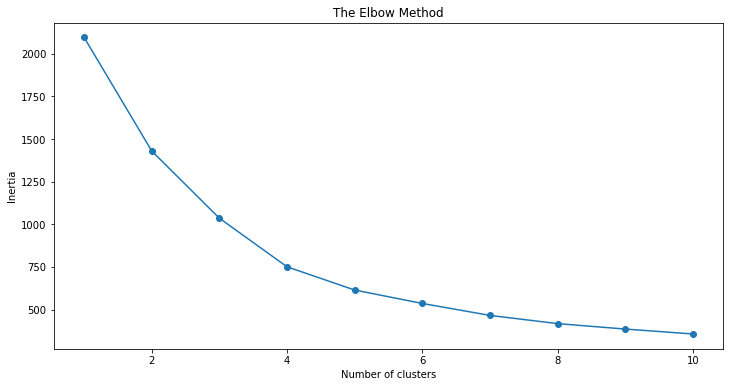

In [80]:
# Fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(stores_scaled)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method');

In [81]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(stores_scaled)
pred = kmeans.predict(stores_scaled)

In [82]:
frame = pd.DataFrame(stores_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    172
0    133
2    103
3     11
Name: cluster, dtype: int64

In [83]:
frame

,0,1,2,3,4,cluster
0,-0.604360,-0.671051,-0.599826,-0.795337,-0.716283,0
1,-0.364851,-0.410730,-0.207377,0.163054,0.206806,1
2,-0.275852,-0.375741,-0.293713,-0.918086,-0.972187,0
3,-0.167153,-0.416329,-0.183187,-1.687631,-1.449984,0
4,-0.304755,-0.172145,-0.253912,-1.479901,-1.769968,0
...,...,...,...,...,...,...
414,-0.775544,-0.673850,-1.119989,-0.455415,-0.227615,0
415,2.688498,3.620033,1.650234,0.705984,0.503251,3
416,2.228678,0.623552,1.107314,0.167775,-0.297811,2
417,-1.335986,-0.928571,-1.970536,-1.064441,-0.861031,0


In [84]:
frame_2 = pd.DataFrame(stores)
frame_2['cluster'] = pred
frame_2['cluster'].value_counts()

1    172
0    133
2    103
3     11
Name: cluster, dtype: int64

In [85]:
frame_2

,avg_month_sales,avg_month_cust,avg_month_prod,avg_discount_rate,discount_freq,cluster
store_id,,,,,,
137,3598.137083,21.500000,861.750000,0.1408,0.292404,0
141,4641.922083,29.250000,1067.250000,0.1611,0.326201,1
143,5029.781667,30.291667,1022.041667,0.1382,0.283034,0
145,5503.497083,29.083333,1079.916667,0.1219,0.265541,0
146,4903.821176,36.352941,1042.882353,0.1263,0.253825,0
...,...,...,...,...,...,...
993,2852.107500,21.416667,589.375000,0.1480,0.310295,0
994,17948.515417,149.250000,2039.958333,0.1726,0.337054,3
996,15944.603750,60.041667,1755.666667,0.1612,0.307725,2


In [86]:
frame_2.groupby('cluster').describe().T

cluster                            0            1             2             3
avg_month_sales   count   133.000000   172.000000    103.000000     11.000000
                  mean   4186.530814  4450.971755   9847.388605  24957.489666
                  std    1701.149542  1692.676408   2430.088495   4220.100131
                  min     148.346364   125.648571   6238.037857  17948.515417
                  25%    3208.321250  3477.938542   8148.659167  23367.180208
                  50%    4128.712500  4455.822083   9215.525417  24504.191739
                  75%    5384.027917  5437.342708  10945.735208  27135.310000
                  max    8308.900417  8826.660417  17501.107083  32660.894167
avg_month_cust    count   133.000000   172.000000    103.000000     11.000000
                  mean     32.196420    28.239342     61.550319    172.750329
                  std      11.887208    11.928965     17.081280     50.952623
                  min       3.727273     3.333333     30.375000    106.875000
                  25%      23.916667    19.510417     48.250000    139.689312
                  50%      31.125000    28.062500     58.333333    149.250000
                  75%      40.291667    35.854167     71.791667    212.104167
                  max      61.250000    74.041667    110.166667    266.666667
avg_month_prod    count   133.000000   172.000000    103.000000     11.000000
                  mean    902.928947   965.706330   1689.778186   2948.960474
                  std     300.097595   294.357262    271.255907    372.476145
                  min      47.863636    54.571429   1236.285714   2039.958333
                  25%     729.291667   803.135417   1477.562500   2875.062500
                  50%     888.750000   987.895833   1632.083333   2902.565217
                  75%    1097.041667  1184.854167   1848.479167   3173.395833
                  max    1500.625000  1600.916667   2499.375000   3378.791667
avg_discount_rate count   133.000000   172.000000    103.000000     11.000000
                  mean      0.136600     0.171477      0.159002      0.183164
                  std       0.015158     0.014491      0.013707      0.018485
                  min       0.076100     0.147900      0.130600      0.148100
                  25%       0.126700     0.160875      0.149600      0.171800
                  50%       0.139300     0.168450      0.157400      0.178500
                  75%       0.148400     0.177475      0.169200      0.199650
                  max       0.161800     0.238900      0.190800      0.205100
discount_freq     count   133.000000   172.000000    103.000000     11.000000
                  mean      0.285794     0.342485      0.316721      0.360479
                  std       0.022030     0.031006      0.024601      0.032504
                  min       0.171250     0.246914      0.265162      0.301436
                  25%       0.270624     0.322649      0.300212      0.336251
                  50%       0.289435     0.338051      0.315196      0.357846
                  75%       0.301927     0.353995      0.332616      0.391112
                  max       0.325671     0.482448      0.389472      0.398996

# Centroids Position

In [87]:
centroids = pd.DataFrame(kmeans.cluster_centers_)

centroids

,0,1,2,3,4
0,-0.469346,-0.311761,-0.521186,-0.993624,-0.896819
1,-0.408667,-0.444678,-0.401298,0.652954,0.651570
2,0.829602,0.674227,0.981485,0.064002,-0.052104
3,4.296787,4.409402,3.386184,1.204708,1.143051


In [88]:
StdScaler = StandardScaler()

centroids_scaled = StdScaler.fit_transform(centroids)

centroids_frame = pd.DataFrame(centroids_scaled)

centroids_frame.columns = stores.columns.values[0:5]

centroids_frame

,avg_month_sales,avg_month_cust,avg_month_prod,avg_discount_rate,discount_freq
0,-0.790155,-0.707673,-0.878990,-1.504740,-1.443022
1,-0.758847,-0.775170,-0.802764,0.516803,0.573105
2,-0.119955,-0.206971,0.076416,-0.206268,-0.343136
3,1.668957,1.689814,1.605337,1.194205,1.213052


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

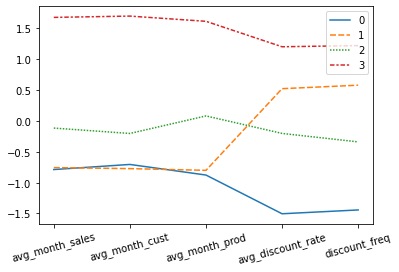

In [89]:
sns.lineplot(data = centroids_frame.T)
plt.xticks(rotation=15)

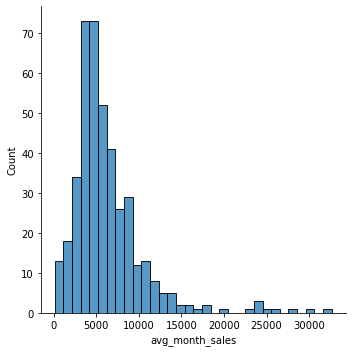

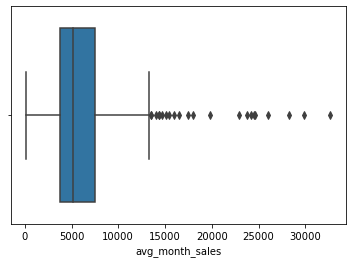

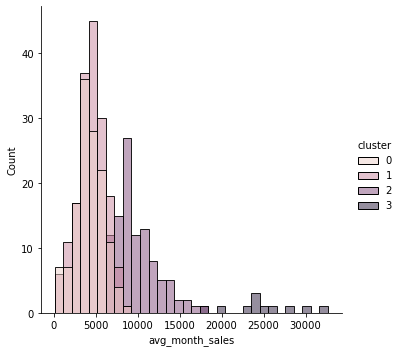

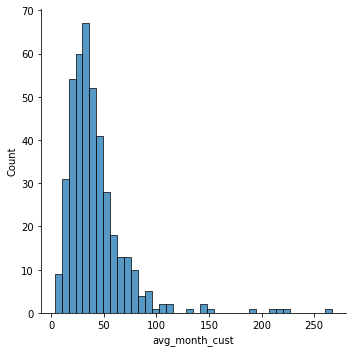

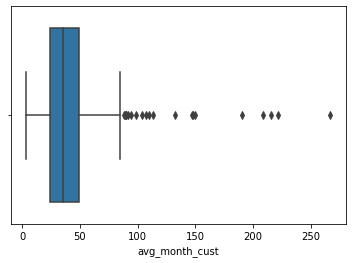

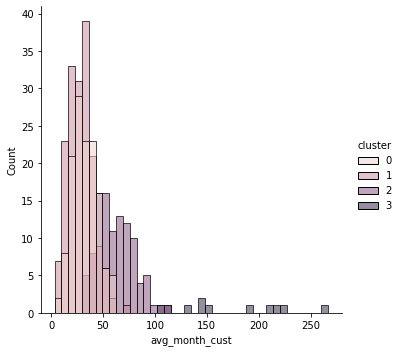

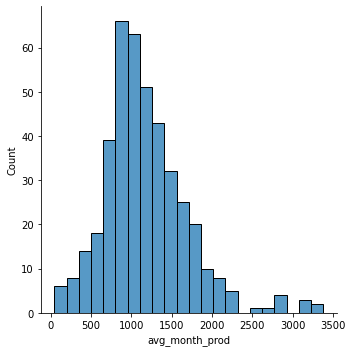

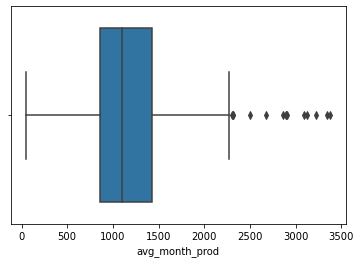

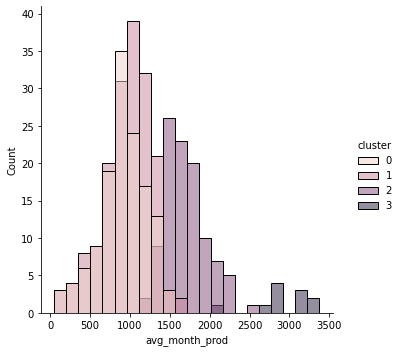

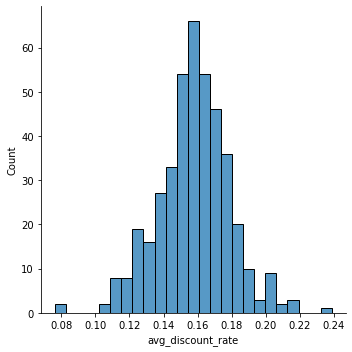

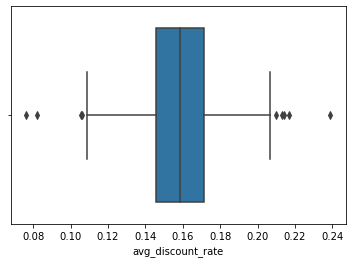

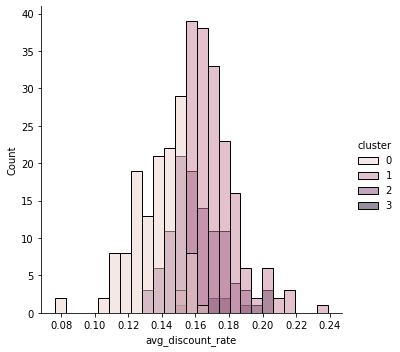

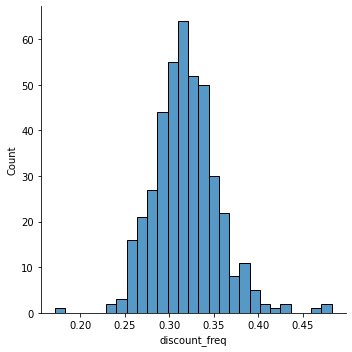

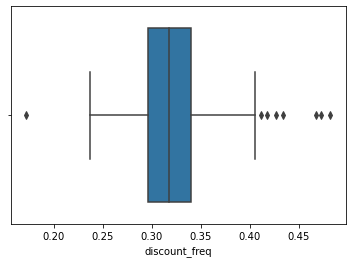

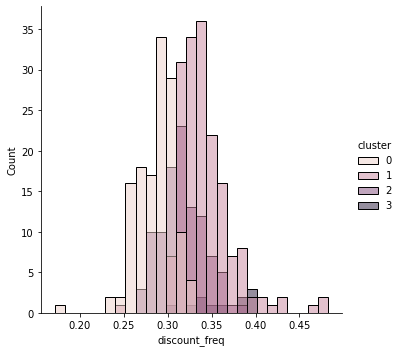

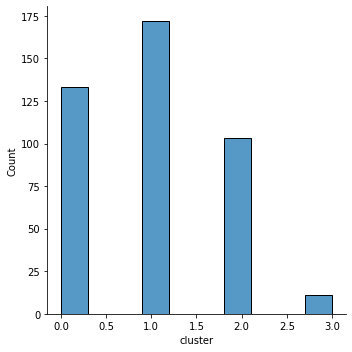

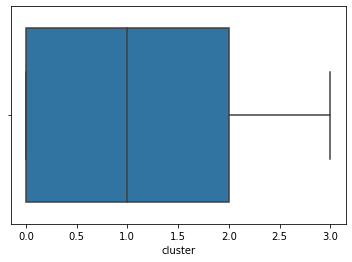

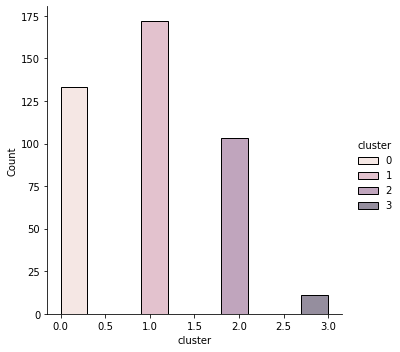

In [90]:
for i in stores.columns.values:
    g = sns.displot(data = stores, x = i)
    plt.show()
    g = sns.boxplot(data = stores, x = i)
    plt.show()
    g = sns.displot(data = stores, x = i, hue = "cluster")
    plt.show()

In [91]:
stores.describe()

,avg_month_sales,avg_month_cust,avg_month_prod,avg_discount_rate,discount_freq,cluster
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,6231.955018,41.477869,1175.839515,0.157646,0.318629,0.980907
std,4363.241627,29.806627,524.259951,0.021207,0.036657,0.818224
min,125.648571,3.333333,47.863636,0.076100,0.171250,0.000000
25%,3732.840417,24.229167,858.166667,0.145800,0.295994,0.000000
50%,5201.168333,35.000000,1097.041667,0.158300,0.317311,1.000000
75%,7562.321651,49.395833,1425.250000,0.171150,0.339756,2.000000
max,32660.894167,266.666667,3378.791667,0.238900,0.482448,3.000000
